## Find all Stars in Simbad Database within Shell Candidates

In [1]:
%matplotlib inline
%gui qt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import shells
import numpy as np
from astroquery.simbad import Simbad

In [3]:
shell_list = shells.get_shells()
stars_list = [shells.simbad_sources(shell.ra.value, shell.dec.value, shell.radius.value) for shell in shell_list]

In [24]:
n=7
stars_list[n]

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object
V* V2645 Ori,05 36 08.336,-06 24 37.86,7,7,70.000,60.000,0,B,I,2003yCat.2246....0C,M5.5,D,2009A&A...504..461F
V* V2651 Ori,05 36 12.606,-06 23 39.57,7,7,70.000,60.000,4,B,I,2003yCat.2246....0C,M5,D,2009A&A...504..461F
JCMTSF J053610.1-062350,05 36 10.1,-06 23 50,5,5,10000.000,10000.000,90,E,m,2008ApJS..175..277D,,,
Parenago 2374,05 36 15.2353,-06 23 55.651,8,8,48.990,40.340,90,B,,1998A&A...335L..65H,F9IV,D,2001A&A...373..159C
[HD93] 7,05 36 12.968,-06 23 32.97,7,7,70.000,60.000,88,B,I,2003yCat.2246....0C,M2.5,D,2009A&A...504..461F
2MASS J05361167-0624583,05 36 11.671,-06 24 58.37,7,7,70.000,60.000,0,B,N,2003yCat.2246....0C,M5,D,2009A&A...504..461F
BD-06 1251,05 36 06.8532,-06 23 35.301,8,8,51.880,40.170,90,B,,1998A&A...335L..65H,F5.0,D,2013ApJ...764..114H
2MASS J05360951-0624336,05 36 09.520,-06 24 33.66,7,7,70.000,60.000,0,B,I,2003yCat.2246....0C,M4.5,D,2009A&A...504..461F


## Plot a sample shell, with all Simbad stars.

In [ ]:
n = 7
cube_file = "../nro_maps/12CO_20161002_FOREST-BEARS_spheroidal_xyb_grid7.5_0.099kms.fits"
cube = shells.SpectralCube.read(cube_file)
hdu = cube.moment0().hdu
shell = shell_list[n]
#AUTO SCALE
ra_grid = cube.spatial_coordinate_map[1]
dec_grid = cube.spatial_coordinate_map[0]
shell_mask = (ra_grid - shell.ra) ** 2. + (dec_grid - shell.dec) ** 2. < shell.radius ** 2.
shell_data = hdu.data[shell_mask]
vmin, vmax = np.nanmin(shell_data), np.nanmax(shell_data)
fig = shells.plot_stamp(map=hdu, ra=shell.ra.value, dec=shell.dec.value, radius=shell.radius.value,
         source_lists=None, stretch='linear', pad_factor=1.5, vmin=vmin, vmax=vmax,
         return_fig=True)
fig.set_title("Shell "+str(n+1))

### Brightest Simbad star in 12 Shell Candidates: F5

In [ ]:
print("All Spectral Types of Simbad Stars in Shell Candidates")
for n in range(len(shell_list)):
    stars = stars_list[n]
    ids = np.array(stars['MAIN_ID'], dtype=str)
    s = Simbad()
    s.add_votable_fields('sptype')
    stars = s.query_objects(ids)
    sptype = np.array(stars['SP_TYPE'], dtype=str)
    bool_oba = np.array([('O' in i or 'B' in i or 'A' in i) for i in sptype])
    stars_oba = stars[bool_oba]
    print(sptype)
#stars_oba = stars[stars['sptype']]

## All OBAF Stars In Orion

In [6]:
cube_file = "../catalogs/MIPS_L1641a_24um.fits"
cube_file = "../nro_maps/12CO_20161002_FOREST-BEARS_spheroidal_xyb_grid7.5_0.099kms.fits"
wcs = shells.WCS(cube_file).celestial
print(wcs)
#print(wcs.to_header())
footprint = wcs.calc_footprint()
ra_min, ra_max = footprint[:,0].min(), footprint[:,0].max()
dec_min, dec_max = footprint[:,1].min(), footprint[:,1].max()
print(footprint)
#coord_map = cube.spatial_coordinate_map
#
from astropy.table import (Table, Column)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SFL'  'DEC--SFL'  
CRVAL : 83.783332999999999  -5.5833329999999997  
CRPIX : 455.19235888999998  775.95882666700004  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00208333333333  0.00208333333333  
NAXIS    : 670 1151
[[ 84.73708316  -7.19783056]
 [ 84.73290012  -4.80199722]
 [ 83.33424074  -4.80199722]
 [ 83.33226239  -7.19783056]]


In [20]:
s = Simbad()
#not dec > 84.4 & ra > -6.66
s.add_votable_fields('sptype')
stars_OBAF = s.query_criteria("ra > {} & ra < {} & dec > {} & dec < {} & (ra < 84.4 | dec < -6.66) & sptypes < G0".format(
        ra_min, ra_max, dec_min, dec_max), otypes="Star")
stars_OBAF['SP_TYPE']
#stars_coord = shells.coord.SkyCoord(stars_OBAF['RA'], stars_OBAF['DEC'], unit=(shells.u.hourangle, shells.u.degree))

A3Ve
B0V
B8(V)
F8.0
B1.5Vp
B3
F8IV
A5e
A3
B8(III)
O9IIIvar


In [19]:
#stars_coord.ra.to(shells.u.hourangle)
stars_OBAF.replace_column('RA', Column(stars_coord.ra, name='RA', unit='deg'))
#stars_OBAF.replace_column('DEC', Column(stars_coord.dec, name='DEC', unit='deg'))
stars_OBAF['RA']
#stars_OBAF = stars_OBAF(stars_coord.ra < 84.4*shells.u.deg) | (stars_coord.dec < -6.66*shells.u.deg)

84.2468766667
83.8159583333
84.46180375
83.76729875
83.7909833333
83.8056120833
83.7266625
84.5388
84.3059495833
83.8083720833
83.8582579167


In [48]:
[sptype[0] for sptype in stars_OBAF['SP_TYPE'].astype('str')]
#stars_OBAF['SP_TYPE'][np.array([sptype[0] for sptype in stars_OBAF['SP_TYPE'].astype('str')]) == '<']
#stars_OBAF.add_column(Column(stars_OBAF['SP_TYPE']))

['A',
 'B',
 'B',
 'F',
 'B',
 'B',
 'F',
 'A',
 'A',
 'B',
 'O',
 'F',
 'B',
 'A',
 'A',
 'B',
 'F',
 'B',
 'F',
 'F',
 'F',
 'F',
 'A',
 'F',
 'A',
 'F',
 'B',
 'A',
 'A',
 'F',
 'F',
 'A',
 'B',
 'B',
 'F',
 'A',
 'F',
 'F',
 'A',
 'O',
 'F',
 'F',
 'B',
 'F',
 'A',
 'F',
 'F',
 'F',
 'F',
 'B',
 'F',
 'B',
 'B',
 'B',
 'B',
 'F',
 'F',
 '<',
 'B',
 'B',
 'A',
 'A',
 'B',
 'F',
 'B',
 'B',
 'F',
 'B',
 'F',
 'A',
 'A',
 'B',
 'F',
 'F',
 'F',
 'B',
 'B',
 'A',
 'F',
 'F',
 'F',
 'F',
 '<',
 'B',
 'B',
 'A',
 'F',
 'A',
 'B',
 'B',
 'O',
 'A',
 'O',
 'B',
 'F',
 'A',
 'F',
 'A',
 'F',
 'F',
 'F',
 'F',
 'F',
 'A',
 'B',
 'F',
 'F',
 'F',
 'F',
 'F',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'F',
 'F',
 'B',
 'F',
 'A']

In [29]:
import astropy 
B_bool = np.array(['B' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
O_bool = np.array(['O' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
A_bool = np.array(['A' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
F_bool = np.array(['F' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
sp_letter_col = Co

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object
* tet01 Ori A,05 35 15.83,-05 23 14.1,6,6,--,--,0,C,R,2014ApJ...790...49K,B0V,C,1977ApJS...34..115W
HD 37373,05 37 50.8329,-06 43 19.544,8,8,28.100,14.820,90,B,,1998A&A...335L..65H,B8(V),D,1999MSS...C05....0H
HD 36982,05 35 09.836,-05 27 53.33,7,7,113.110,106.690,0,B,,1988A&AS...74..449R,B1.5Vp,C,
HD 294264,05 35 13.3469,-04 51 44.947,8,8,26.750,20.180,90,B,,1998A&A...335L..65H,B3,E,1995A&AS..110..367N
HD 36999,05 35 14.0093,-05 49 36.272,8,8,51.660,17.070,0,B,,1998A&A...335L..65H,B8(III),D,1999MSS...C05....0H
HD 36783,05 33 52.1184,-06 36 56.317,8,8,19.560,17.940,0,B,,1998A&A...335L..65H,B9V,C,1999MSS...C05....0H
HD 37209,05 36 35.6933,-06 03 53.108,9,9,3.080,2.110,90,A,O,2007A&A...474..653V,B3IV,C,2008ApJS..176..216A
* iot Ori B,05 35 26.45,-05 54 44.5,6,6,70.000,70.000,90,B,I,2003yCat.2246....0C,B8III,C,2008ApJS..176..216A


## Plot All OBAF Stars

INFO: Auto-setting vmin to -4.826e+04 [aplpy.core]
INFO: Auto-setting vmax to  4.035e+05 [aplpy.core]


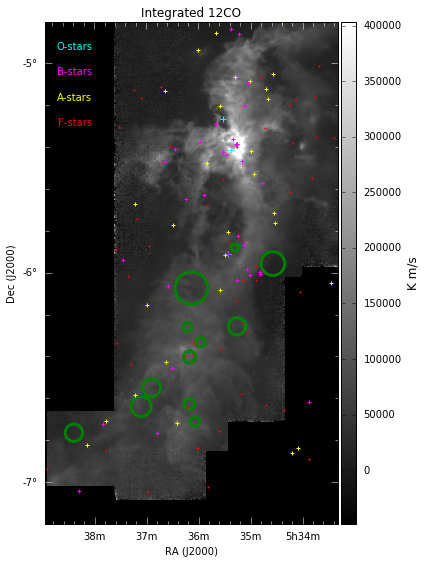

In [18]:
import shells
fig = shells.plot_overview(cube="../nro_maps/12CO_20161002_FOREST-BEARS_spheroidal_xyb_grid7.5_0.099kms.fits",
                           mode='mom0', return_fig=True,
                           circle_color='green', circle_linewidth=3, circle_style='solid')
fig.show_markers(stars_coord[O_bool].ra, stars_coord[O_bool].dec, marker='+', layer='O', edgecolor='cyan', s=30, facecolor='cyan')
fig.show_markers(stars_coord[B_bool].ra, stars_coord[B_bool].dec, marker='+', layer='B', edgecolor='magenta', s=20, facecolor='magenta')
fig.show_markers(stars_coord[A_bool].ra, stars_coord[A_bool].dec, marker='+', layer='A', edgecolor='yellow', s=10, facecolor='yellow')
fig.show_markers(stars_coord[F_bool].ra, stars_coord[F_bool].dec, marker='+', layer='F', edgecolor='red', s=2, facecolor='red')

fig.add_colorbar()
fig.colorbar.set_axis_label_text("K m/s")
fig.colorbar.set_axis_label_font(size=12)
fig.set_tick_labels_xformat("hh:mm")
fig.set_tick_labels_yformat("dd")
fig.add_label(0.1, 0.95, "O-stars", relative=True, color='cyan')
fig.add_label(0.1, 0.9, "B-stars", relative=True, color='magenta')
fig.add_label(0.1, 0.85, "A-stars", relative=True, color='yellow')
fig.add_label(0.1, 0.80, "F-stars", relative=True, color='red')
fig.set_title("Integrated 12CO")
fig.set_nan_color('black')
#fig.show_grayscale()

In [19]:
fig.save('obaf_12comom0.png', dpi=300)


## Send O/B/A/F stars to Glue to search for additional shells.

In [20]:
import astropy.units as u
import astropy.coordinates as coord
s = Simbad()
#not dec > 84.4 & ra > -6.66
s.add_votable_fields('sptype')
stars_OBAF = s.query_criteria("ra > {} & ra < {} & dec > {} & dec < {} & (ra < 84.4 | dec < -6.66) & sptypes < G0".format(
        ra_min.value, ra_max.value, dec_min.value, dec_max.value), otypes="Star")

c = coord.SkyCoord(stars_OBAF['RA'], stars_OBAF['DEC'], unit=(u.hourangle, u.degree))
stars_OBAF['RA'] = c.ra.to(u.deg)
stars_OBAF['DEC'] = c.dec.to(u.deg)
B_bool = np.array(['B' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
O_bool = np.array(['O' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
A_bool = np.array(['A' in s for s in stars_OBAF['SP_TYPE'].astype(str)])
F_bool = np.array(['F' in s for s in stars_OBAF['SP_TYPE'].astype(str)])

NameError: name 'Simbad' is not defined

In [2]:
from glue import qglue
from glue.qglue import parse_data
from glue.core.data_factories import (load_data, astropy_tabular_data)
from glue.core import DataCollection, Data
from glue.core.link_helpers import LinkSame
from glue.app.qt.application import GlueApplication
from astropy.io import fits


## Load Data into Glue and Link RA/DEC

In [ ]:
f12co = fits.open('../nro_maps/12CO_20161002_FOREST-BEARS_spheroidal_xyb_grid7.5_0.099kms.fits')
f13co = fits.open('../nro_maps/13CO_20161011_FOREST-BEARS_xyb_spheroidal_dV0.11kms_YS.fits')
f8micron = fits.open('../catalogs/IRAC_L1641_ch4_merged_clean.fits')
f24micron = fits.open('../catalogs/MIPS_L1641a_24um.fits')

nro_12co = parse_data(f12co, '')[0]
nro_12co.label="NRO 12CO"
nro_13co = parse_data(f13co, '')[0]
nro_13co.label="NRO 13CO"
irac_8micron = parse_data(f8micron, '')[0]
irac_8micron.label = 'IRAC 8micron'
mips_24micron = parse_data(f24micron, '')[0]
mips_24micron.label = "MIPS 24micron"

subset_bools = [O_bool, B_bool, A_bool, F_bool]
subset_labels = ['o_stars', 'b_stars', 'a_stars', 'f_stars']

o_stars = parse_data(stars_OBAF[O_bool], 'o stars')[0]
b_stars = parse_data(stars_OBAF[B_bool], 'b stars')[0]
a_stars = parse_data(stars_OBAF[A_bool], 'a stars')[0]
f_stars = parse_data(stars_OBAF[F_bool], 'f stars')[0]

f12co.close()
f13co.close()
f8micron.close()
f24micron.close()

dc = DataCollection([nro_12co, nro_13co, 
                     irac_8micron, mips_24micron,
                     o_stars, b_stars, a_stars, f_stars])

## Link RA/DEC

In [ ]:
for i in range(1, len(dc)):
    try:
        dc.add_link(LinkSame(dc[0].id['Right Ascension'], dc[i].id['Right Ascension']))
        dc.add_link(LinkSame(dc[0].id['Declination'], dc[i].id['Declination']))
    except KeyError: #When dc[i] refers to stars data.
        dc.add_link(LinkSame(dc[0].id['Right Ascension'], dc[i].id['RA']))
        dc.add_link(LinkSame(dc[0].id['Declination'], dc[i].id['DEC']))

## Open Image Viewers and Overlay Stars

In [ ]:
from glue.viewers.scatter.qt import ScatterWidget
from glue.viewers.image.qt import ImageWidget
tab_labels = ["12CO", "13CO", "8 micron", "24 micron"]

app = GlueApplication(dc)

o_stars.style.color = 'cyan'
b_stars.style.color = 'magenta'
a_stars.style.color = 'yellow'
f_stars.style.color = 'red'
for i in range(len(tab_labels)):
    if i > 0:
        app.new_tab()
    app.tab_widget.setTabText(i, tab_labels[i])
    image = app.new_data_viewer(ImageWidget, dc[i])
    image.add_layer(f_stars)
    image.add_layer(a_stars)
    image.add_layer(b_stars)
    image.add_layer(o_stars)

    
#app.new_data_viewer(ImageWidget)
#tabs = app.tab_widget()
#for i in range(n_tabs):
#app.new




#image_12co = app.new_data_viewer(ImageWidget)
#image_12co.add_data(dc[0])

#app.tab_bar.addTab("13CO")

#app.tab_widget.setCurrentIndex(1)
#app.tab(2)
#app.tab_bar.currentIndex = 2

#app.add_widget(ImageWidget, tab=1)

#app.add_widget(ImageWidget)
#app.new_data_viewer(ImageWidget, dc[0])


#image_12co = app.new_data_viewer(ImageWidget)
#image_12co.add_data(dc[0])



In [ ]:
app.start()

## Filter YSOs by K magnitude, focus search around brightest YSOs and OBA stars.

In [19]:
from astropy.io import fits
from astropy.table import Table
K_bins = [5, 6, 7, 8] #~half of YSOs are K < 13.
yso_table = Table(fits.open('../catalogs/spitzer_orion.fit')[1].data)

for i in range(len(K_bins) - 1):
    yso = yso_table[(yso_table['Kmag'] >= K_bins[i]) & (yso_table['Kmag'] < K_bins[i+1])]
    print(yso)
    
    
#yso_table['Kmag'] > K_bins[0]

#yso_table['Kmag']


   _RAJ2000      _DEJ2000    Seq     RAJ2000    ... alpha  Cl _2M Simbad
------------- -------------- ---- ------------- ... ----- --- --- ------
    84.575625 -7.04063888889  670     84.575625 ...   nan  P   2M Simbad
84.1059583333 -6.71594444444  796 84.1059583333 ...   nan  D   2M Simbad
83.8219583333 -5.38797222222 1842 83.8219583333 ...   nan  D   2M Simbad
   _RAJ2000      _DEJ2000    Seq     RAJ2000    ... alpha  Cl _2M Simbad
------------- -------------- ---- ------------- ... ----- --- --- ------
83.6957916667 -5.57072222222 1440 83.6957916667 ... -0.94  D   2M Simbad
83.9600833333 -5.47622222222 1600 83.9600833333 ... -0.61  D   2M Simbad
        83.86 -5.41688888889 1748         83.86 ... -0.98  D   2M Simbad
83.8074583333 -5.36663888889 1913 83.8074583333 ...  0.25  P   2M Simbad
83.8339166667 -5.22097222222 2237 83.8339166667 ...  0.93  P   2M Simbad
   _RAJ2000       _DEJ2000    Seq     RAJ2000    ... alpha  Cl _2M Simbad
------------- --------------- ---- ------------- .

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater_equal
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less
